# SGD Regression Model - Hyperparameter Tuning

## Strategy:
- Use ALL 4 features for maximum prediction accuracy
- Grid search hyperparameters: learning_rate, penalty, alpha, eta0
- Extensive visualization and analysis

Data shape: (9568, 5)
Checking for duplicate feature combinations...
Rows with duplicate features: 82
Groups with same output: 41
Groups with different outputs: 0
Safe to remove duplicates - same features have same outputs
After removing duplicates: (9527, 5)

Missing values:
ambient_temp         0
vacuum               0
ambient_pressure     0
relative_humidity    0
power_output         0
dtype: int64

Data types:
ambient_temp         float64
vacuum               float64
ambient_pressure     float64
relative_humidity    float64
power_output         float64
dtype: object
Feature statistics:
       ambient_temp       vacuum  ambient_pressure  relative_humidity
count   9527.000000  9527.000000       9527.000000        9527.000000
mean      19.658225    54.293421       1013.237084          73.334951
std        7.444397    12.686309          5.940526          14.607513
min        1.810000    25.360000        992.890000          25.560000
25%       13.530000    41.740000       1009.085000   

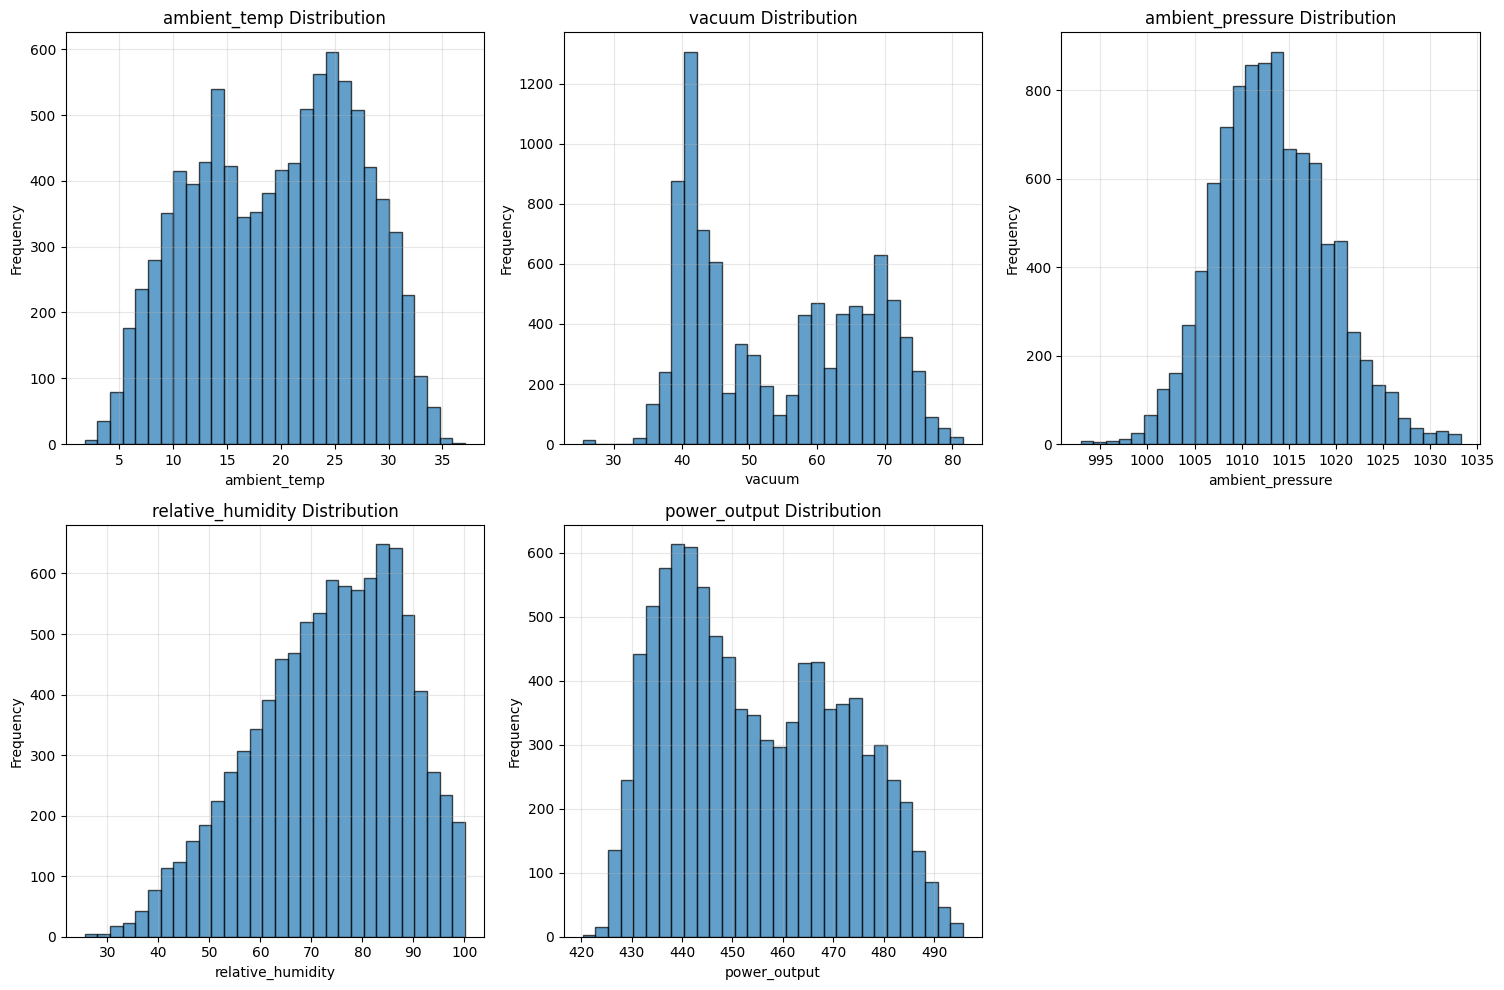

STANDARDIZATION ANALYSIS:
Feature scales (before standardization):
ambient_temp        : mean=   19.7, std=  7.4, range= 35.3
vacuum              : mean=   54.3, std= 12.7, range= 56.2
ambient_pressure    : mean= 1013.2, std=  5.9, range= 40.4
relative_humidity   : mean=   73.3, std= 14.6, range= 74.6

After standardization:
ambient_temp        : mean=-0.0000, std=1.0001
vacuum              : mean=-0.0000, std=1.0001
ambient_pressure    : mean= 0.0000, std=1.0001
relative_humidity   : mean=-0.0000, std=1.0001

Why standardization is essential:
- Different units: °C, cm Hg, millibar, %
- Different scales: prevent feature dominance
- SGD sensitivity: ensures equal gradient contribution
- OLS stability: fixes numerical condition issues


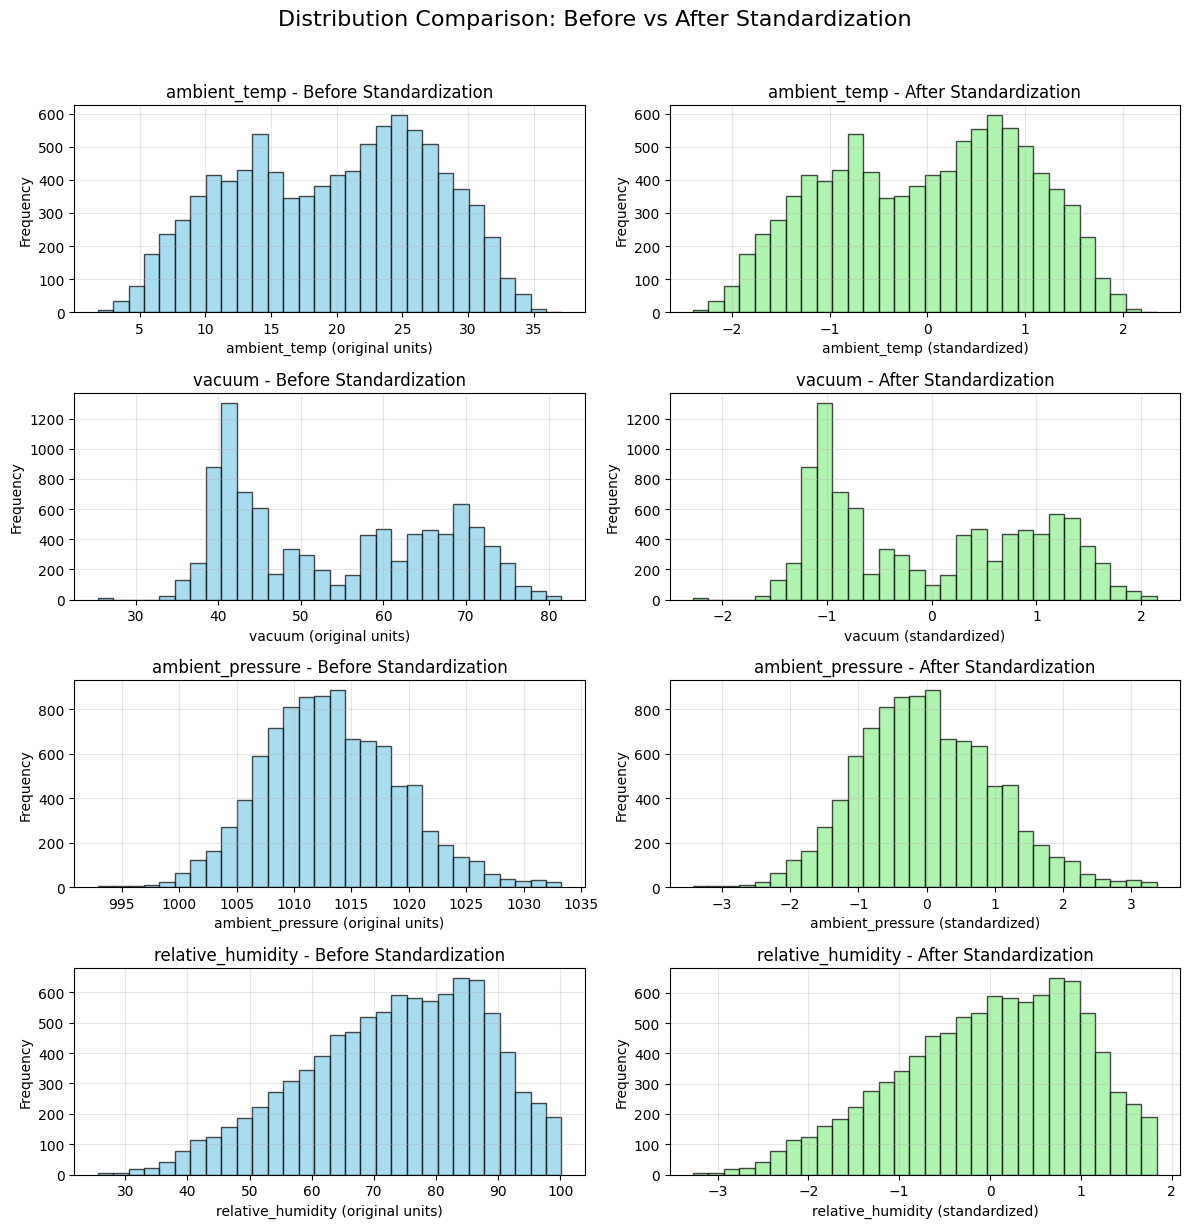

Feature-Target Correlations:
ambient_temp: -0.948
vacuum: -0.870
ambient_pressure: +0.519
relative_humidity: +0.391

Feature-Feature Correlations:
ambient_temp - vacuum: 0.844
ambient_temp - ambient_pressure: -0.508
vacuum - ambient_pressure: -0.416
High correlation (>0.7) indicates multicollinearity problem


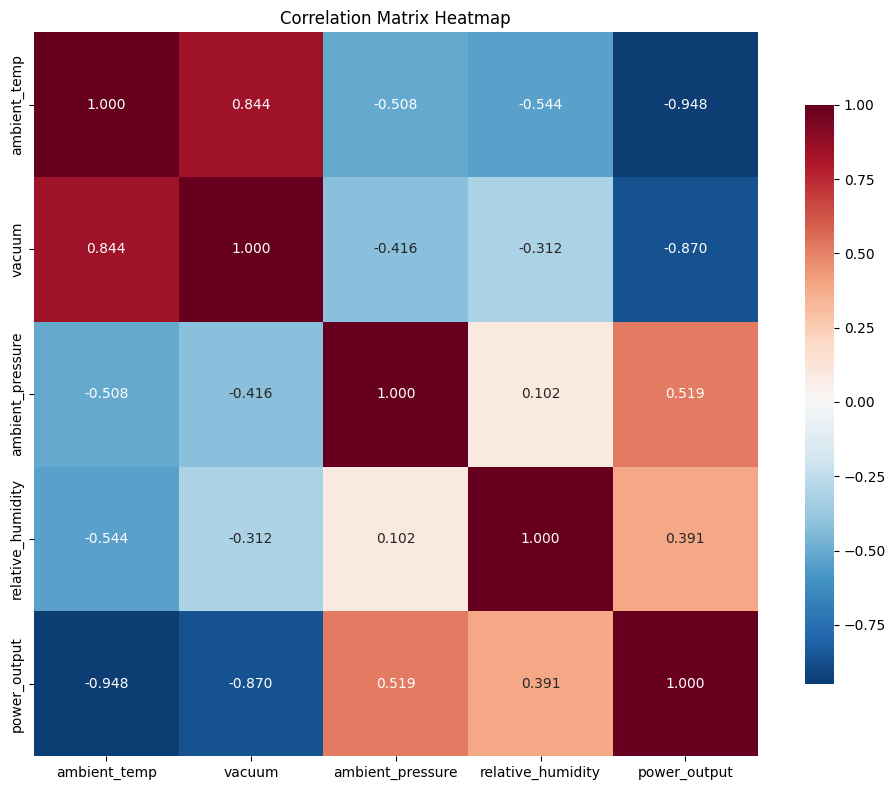

Testing all possible feature combinations:
------------------------------------------------------------
Top 10 feature combinations (by test R²):
 1. [4 features] Test R²=0.9284 | ambient_temp, vacuum, ambient_pressure, relative_humidity
 2. [3 features] Test R²=0.9282 | ambient_temp, vacuum, relative_humidity
 3. [3 features] Test R²=0.9209 | ambient_temp, ambient_pressure, relative_humidity
 4. [2 features] Test R²=0.9209 | ambient_temp, relative_humidity
 5. [3 features] Test R²=0.9179 | ambient_temp, vacuum, ambient_pressure
 6. [2 features] Test R²=0.9164 | ambient_temp, vacuum
 7. [2 features] Test R²=0.9013 | ambient_temp, ambient_pressure
 8. [1 features] Test R²=0.9000 | ambient_temp
 9. [3 features] Test R²=0.8106 | vacuum, ambient_pressure, relative_humidity
10. [2 features] Test R²=0.7960 | vacuum, ambient_pressure

Best combination: ['ambient_temp', 'vacuum', 'ambient_pressure', 'relative_humidity']
Best test R²: 0.9284
TRUSTWORTHY FEATURE ANALYSIS FOR OLS:
All feature com

In [ ]:
# Import additional libraries needed for SGD modeling
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from itertools import product
import time

# Load preprocessing results from preprocessing.ipynb
%run preprocessing.ipynb
print("Preprocessing complete. Data ready for modeling.")

# Set seed for reproducibility
RANDOM_SEED = 42

# Verify we have the key variables available
print(f"\nVerifying data availability:")
print(f"- Data shape: {data.shape}")
print(f"- Features: {features}")
print(f"- Target: {target}")
print(f"- Standardized features shape: {X_standardized.shape}")
print(f"- All variables loaded successfully!")

In [ ]:
# Define comprehensive hyperparameter grid for SGDRegressor
param_grid = {
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1],
    'eta0': [0.001, 0.01, 0.1]
}

# Calculate total combinations
total_combinations = 1
for param, values in param_grid.items():
    total_combinations *= len(values)
    print(f"{param}: {len(values)} options -> {values}")

total_experiments = total_combinations * 3  # 3-fold CV
print(f"\n" + "="*50)
print(f"HYPERPARAMETER SEARCH SUMMARY:")
print(f"- Parameter combinations: {total_combinations}")
print(f"- CV folds: 3")
print(f"- Total models to train: {total_experiments}")
print(f"- Using all 4 features with pre-standardized data")
print(f"- Early stopping will determine iterations needed")
print(f"="*50)

In [ ]:
# TODO: Multi-seed grid search loop
# For each seed in VALIDATION_SEEDS:
#   1. Train-test split with current seed
#   2. Standardize features (fit on train, transform both)
#   3. GridSearchCV with 5-fold CV
#   4. Store best params and performance metrics
#   5. Calculate additional metrics (RMSE, MAE)
#   6. Store detailed results for analysis

In [ ]:
# TODO: Results analysis
# Convert results to DataFrames
# Performance summary across seeds
# Best overall performance identification

In [ ]:
# TODO: Visualization 1 - Performance across seeds
# 2x2 subplot:
# - R² comparison (CV vs Test)
# - RMSE across seeds
# - Performance stability boxplots
# - Error metrics scatter plot

In [ ]:
# TODO: Visualization 2 - Hyperparameter analysis
# 2x3 subplot analyzing each parameter:
# - learning_rate: boxplot
# - penalty: boxplot
# - alpha: scatter (log scale)
# - max_iter: scatter
# - eta0: scatter

In [ ]:
# TODO: Visualization 3 - Parameter interactions
# Heatmaps:
# - learning_rate vs penalty
# - alpha vs max_iter

In [ ]:
# TODO: Best model analysis
# Find most frequent parameters across seeds
# Recommend final parameters based on frequency
# Parameter frequency analysis

In [ ]:
# TODO: Final model evaluation
# Train model with recommended parameters using RANDOM_SEED
# Performance metrics on train/test
# Feature coefficients analysis
# Model summary

In [ ]:
# TODO: Summary and export
# Create comprehensive summary dictionary
# Include: model_type, features_used, validation_strategy, recommended_params,
#          final_performance, stability_metrics, feature_coefficients
# Print final results for report